In [1]:
from speclib import *

/home/dogg/anaconda3/lib/python3.7/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


Audio length: 8.83 seconds, Sample rate: 44100 Hz


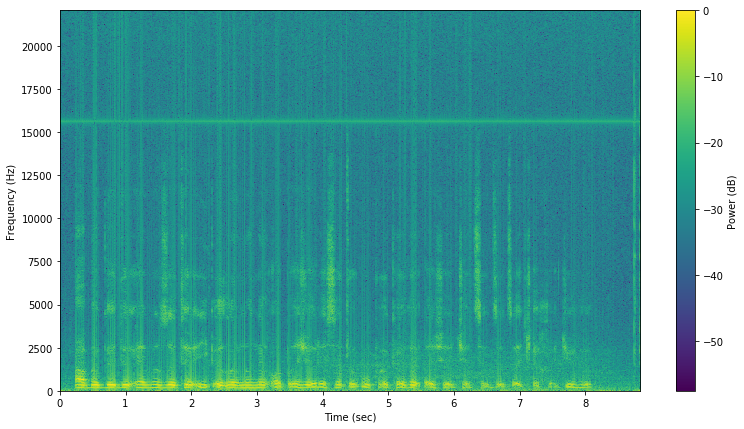

In [2]:
audio_base_path = 'audio/'
audio_file_names = ['abc.wav', '500hz_-3dbfs.wav', 'test.wav', 'hawking01.wav', 'edison.wav']

fs, audio_data = read_wav_audio(audio_base_path + audio_file_names[0])

plot_specgram(audio_data, fs, colorbar=True, labels=True, figsize=(13, 7))

In [3]:
# define a function which enables us to plot multiple spectrograms together
def plot_specgrams(audio_file_names,
                   audio_base_path='audio/', n_width=1024, n_overlap=512, eps=None,
                   figsize=None, colorbars=True, labels=True, ticks=True, n_rows=2, verbose=False):
    # if plotting only one audio, reduce n_rows to 1
    if len(audio_file_names) == 1:
        n_rows = 1

    # compute number of needed columns
    n_cols = int(np.ceil(len(audio_file_names) / n_rows))

    if not ticks:
        subplot_kw = {'xticks': [], 'yticks': []}
    else:
        subplot_kw = None

    fig, axs = plt.subplots(n_rows, n_cols, subplot_kw=subplot_kw,
                            figsize=figsize, constrained_layout=True)

    for i in range(n_rows):
        for j in range(n_cols):
            try:
                curr_name = audio_file_names[i * n_cols + j]

                if verbose:
                    print('Current audio: ' + curr_name)

                fs, audio_data = read_wav_audio(audio_base_path + curr_name,
                                                verbose=verbose)

                # make sure that this function works for every list size
                if n_rows == 1 and n_cols == 1:
                    ax = axs
                elif n_rows == 1:
                    ax = axs[j]
                elif n_cols == 1:
                    ax = axs[i]
                else:
                    ax = axs[i, j]

                spectrogram_show(audio_data, ax, fs,
                                 eps, n_width, n_overlap, colorbars, labels)

            except IndexError:
                if verbose:
                    print("Cell ({}, {}) is left unused".format(i, j))
                pass

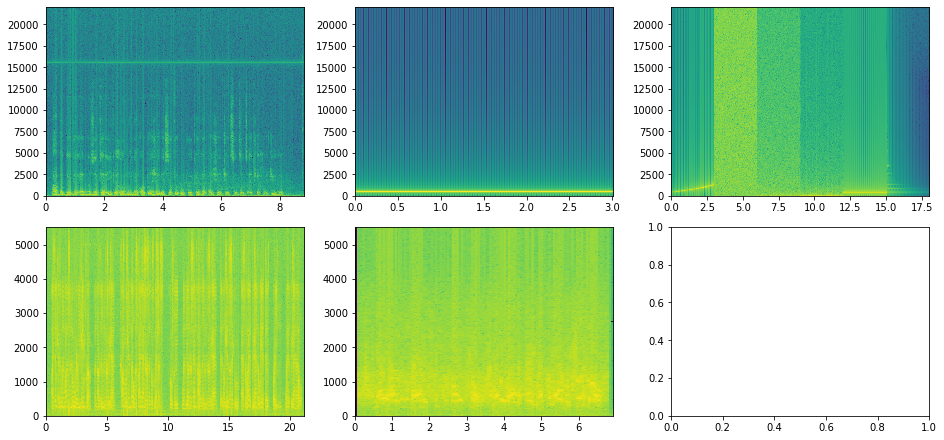

In [4]:
# result is pretty powerful function with many useful parameters
plot_specgrams(audio_file_names, 
               colorbars=False, labels=False, eps=None, figsize=(13, 6), ticks=True, verbose=False)

In [5]:
# function which enables us to plot multiple spectrograms together (but using matplotlib's specgram)
# it's basically plot_specgrams function with less features
def matplot_specgrams(audio_file_names,
                      audio_base_path='audio/', n_width=1024, n_overlap=512,
                      figsize=None, ticks=True, n_rows=2, verbose=False):
    # if plotting only one audio, reduce n_rows to 1
    if len(audio_file_names) == 1:
        n_rows = 1

    # compute number of needed columns
    n_cols = int(np.ceil(len(audio_file_names) / n_rows))

    if not ticks:
        subplot_kw = {'xticks': [], 'yticks': []}
    else:
        subplot_kw = None

    fig, axs = plt.subplots(n_rows, n_cols, subplot_kw=subplot_kw,
                            figsize=figsize, constrained_layout=True)

    for i in range(n_rows):
        for j in range(n_cols):
            try:
                curr_name = audio_file_names[i * n_cols + j]

                if verbose:
                    print('Current audio: ' + curr_name)

                fs, audio_data = read_wav_audio(audio_base_path + curr_name,
                                                verbose=verbose)

                # make sure that this function works for every list size
                if n_rows == 1 and n_cols == 1:
                    ax = axs
                elif n_rows == 1:
                    ax = axs[j]
                elif n_cols == 1:
                    ax = axs[i]
                else:
                    ax = axs[i, j]

                ax.specgram(audio_data, Fs=fs, NFFT=n_width,
                            noverlap=n_overlap, window=plt.mlab.window_none)
            except IndexError:
                if verbose:
                    print("Cell ({}, {}) is left unused".format(i, j))
                pass

/home/dogg/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:7725: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


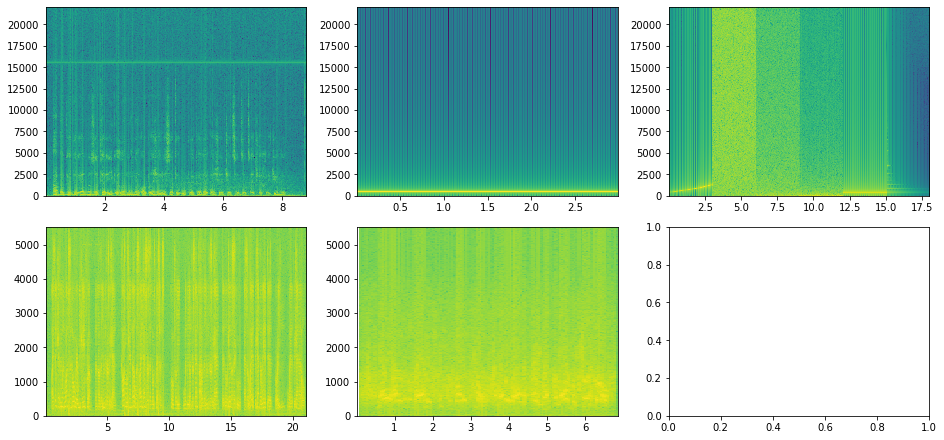

In [6]:
matplot_specgrams(audio_file_names, figsize=(13, 6), ticks=True)